In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
%pip install nltk
%pip install mlxtend
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

DEPRECATION: Loading egg at c:\users\akshra_\appdata\local\programs\python\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\akshra_\appdata\local\programs\python\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
data = pd.read_csv("C:/Users/Akshra_/Downloads/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

In [17]:
data.head()


,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


#akshat begin----

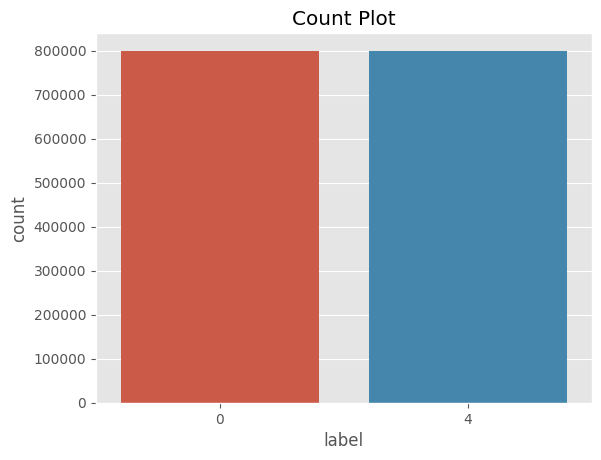

In [18]:
import seaborn as sns
sns.countplot(x='label', data=data)
plt.title('Count Plot')
plt.show()


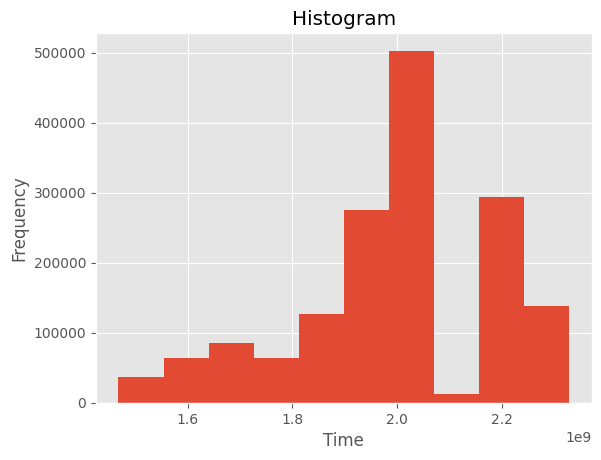

In [19]:
plt.hist(data['time'], bins=10)
plt.title('Histogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


In [7]:
#akshat kumar ----end 

In [ ]:
data=data[['text','label']]


In [20]:
data['label'][data['label']==4]=1

In [21]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [22]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [23]:
data = pd.concat([data_pos, data_neg])

In [24]:
data['text']=data['text'].str.lower()

In [ ]:
data['text'].tail()


In [26]:
stopwords_list = stopwords.words('english')

In [27]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [28]:
import nltk
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akshra_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [29]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


In [30]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()


19995                                     one day holidays
19996                     feeling right  hate damn humprey
19997    geezi hv read whole book personality types emb...
19998     threw sign donnie bent get thingee made sad face
19999    heather2711 good thing find none ones like com...
Name: text, dtype: object

In [32]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', 
                  r'\1', text)

In [33]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()


19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

In [35]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)


In [36]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

In [37]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()


19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

In [38]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather god thing find none ones like come siz...
Name: text, dtype: object

In [39]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [40]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [28]:
import nltk
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
data['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [41]:
X=data.text
y=data.label

In [42]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [43]:
sequences_matrix.shape

(40000, 500)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [33]:
#akshat kumar 21070122014--begin--2

In [34]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

In [35]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy']) 

In [36]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=1, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')



315/315 [==============================] - 139s 431ms/step - loss: 0.6112 - accuracy: 0.6519 - val_loss: 0.5325 - val_accuracy: 0.7379
Training finished !!


In [37]:
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

375/375 [==============================] - 20s 51ms/step - loss: 0.5341 - accuracy: 0.7319


In [38]:
print(' Accuracy: {:0.2f}'.format(accr1[1])) #the accuracy of the model on test data is given below

 Accuracy: 0.73


In [39]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

375/375 [==============================] - 20s 52ms/step




confusion matrix


[[4197 1812]
 [1405 4586]]




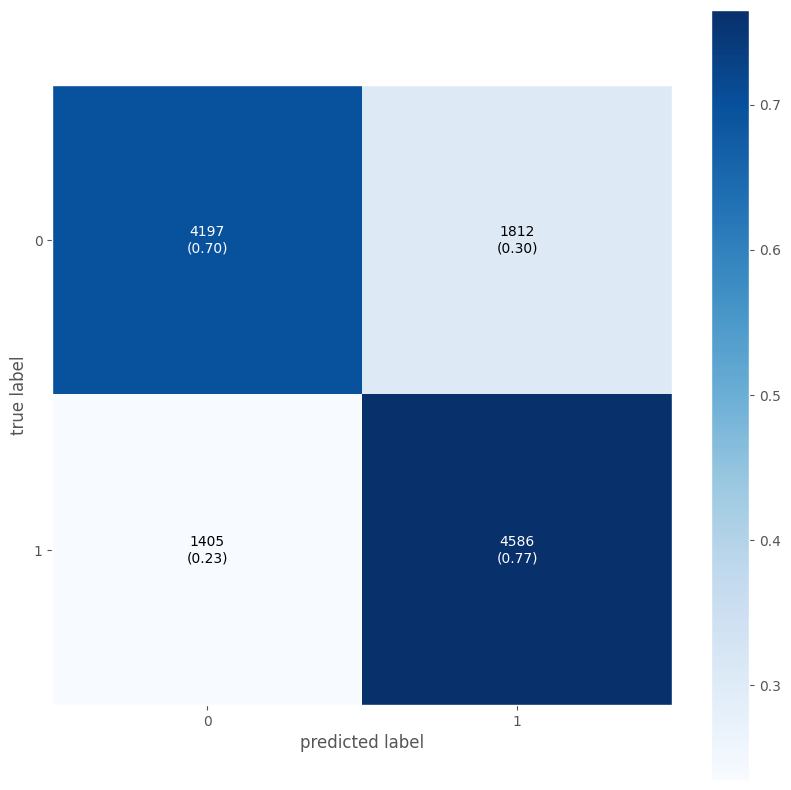

In [40]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

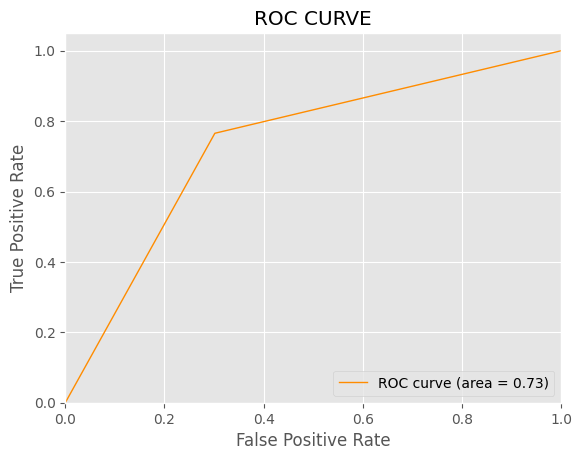

In [41]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

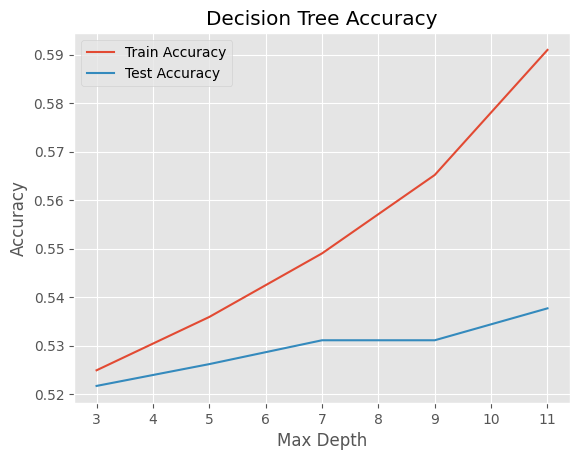

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train Decision Tree
def train_decision_tree(X_train, Y_train_train, max_depth=None):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, Y_train_train)
    return model

# Calculate Accuracy
def calculate_accuracy(model, X_test, Y_test_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test_test, y_pred)
    return accuracy

# Visualize Decision Tree
def visualize_decision_tree(model, feature_names):
    plt.figure(figsize=(15, 10))
    plot_tree(model, feature_names=feature_names, class_names=model.classes_, filled=True)
    plt.show()

# Visualize Accuracy
def plot_accuracy(max_depth_values, train_accuracies, test_accuracies):
    plt.plot(max_depth_values, train_accuracies, label='Train Accuracy')
    plt.plot(max_depth_values, test_accuracies, label='Test Accuracy')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Accuracy')
    plt.legend()
    plt.show()

# Example usage
# Assuming you have X_train, X_test, y_train, y_test already defined

max_depth_values = [3, 5, 7, 9, 11]

train_accuracies = []
test_accuracies = []

for depth in max_depth_values:
    # Train Decision Tree
    model = train_decision_tree(X_train, Y_train, max_depth=depth)
    
    # Calculate Accuracy
    train_accuracy = calculate_accuracy(model, X_train, Y_train)
    test_accuracy = calculate_accuracy(model, X_test, Y_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


# Visualize Accuracy
plot_accuracy(max_depth_values, train_accuracies, test_accuracies)


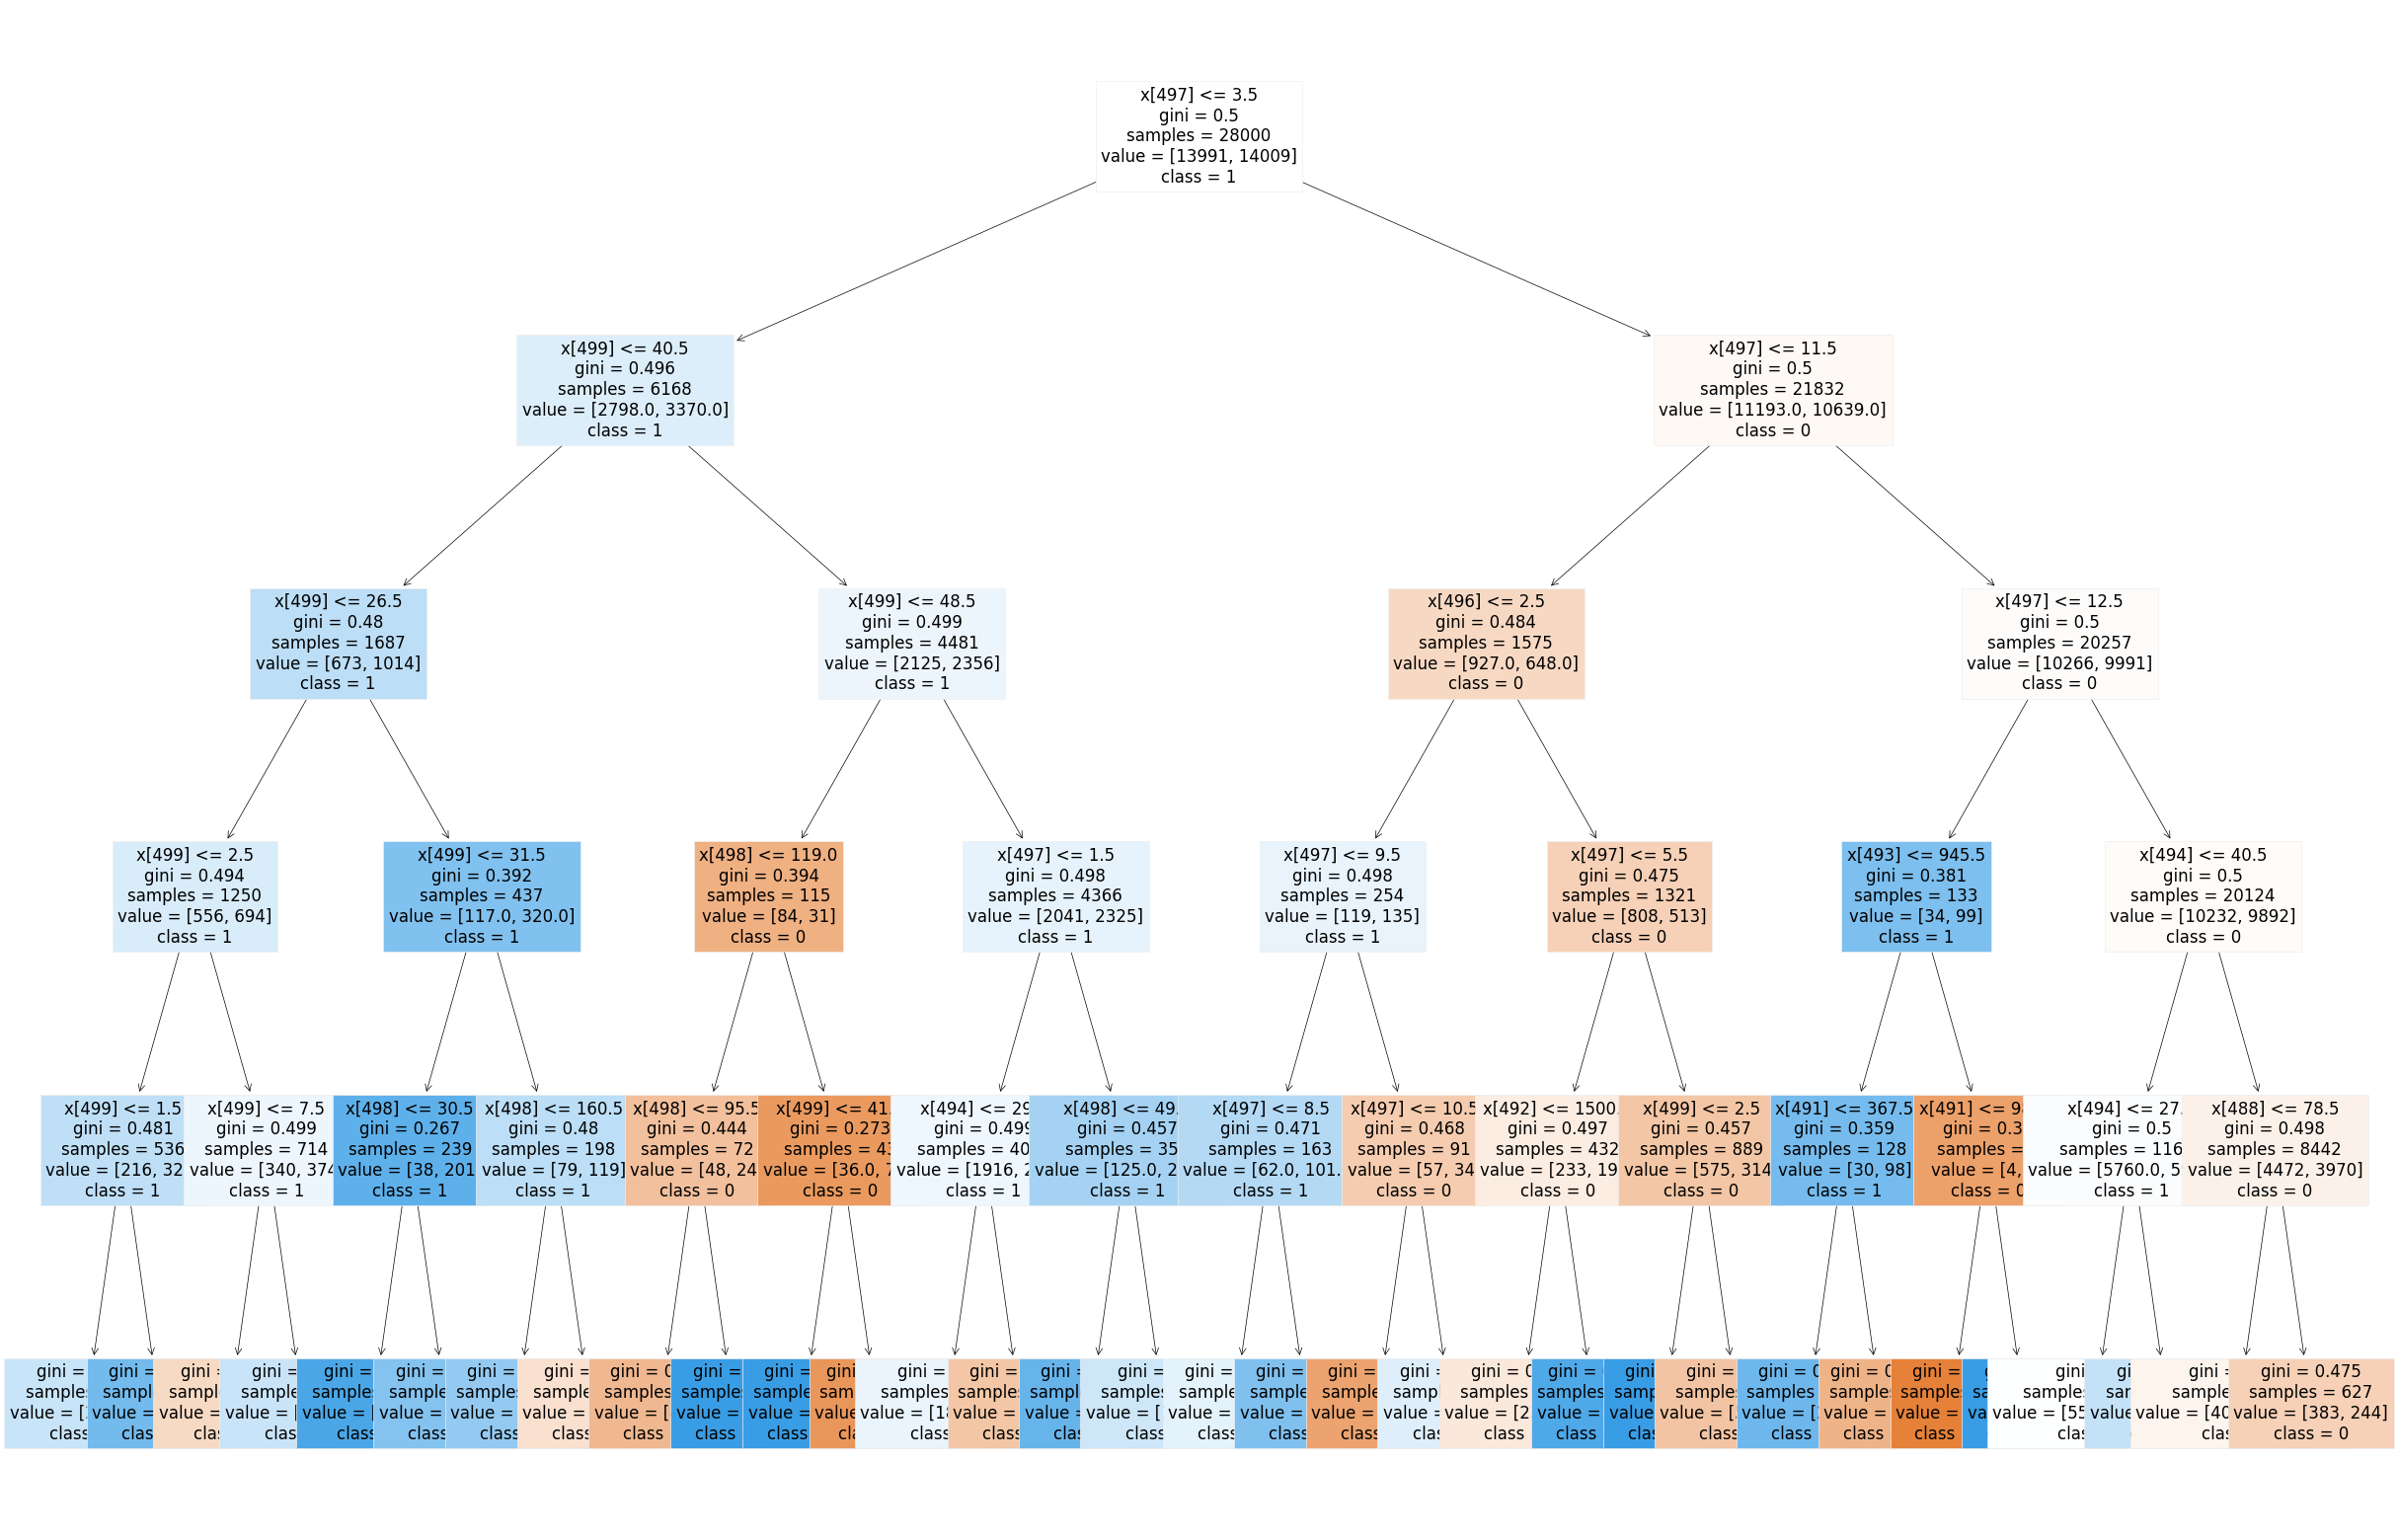

In [43]:
# Visualize Decision Tree with Customization
def visualize_decision_tree(model):
    plt.figure(figsize=(30, 20))  # Increase figure size
    plot_tree(model, class_names=['0', '1'], filled=True, fontsize=12)  # Increase font size and fill colors
    plt.show()

# Example usage
model = train_decision_tree(X_train, Y_train, max_depth=5)
visualize_decision_tree(model)


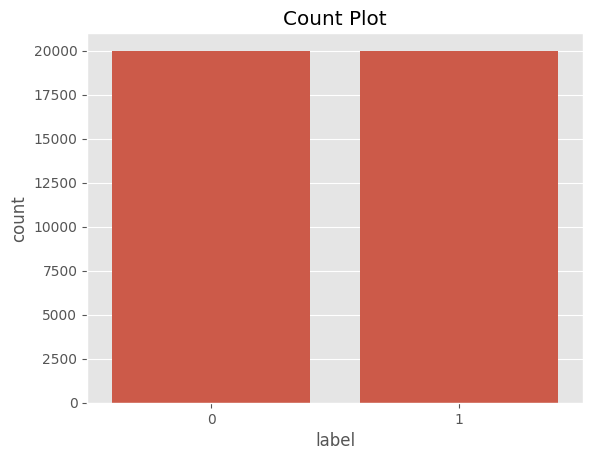

In [44]:
import seaborn as sns
sns.countplot(x='label', data=data)
plt.title('Count Plot')
plt.show()


In [45]:

#akshra begins

In [46]:
from sklearn.ensemble import RandomForestClassifier

def train_random_forest(X_train, Y_train, n_estimators=100, max_depth=None):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, Y_train)
    return model

# Example usage
model_rf = train_random_forest(X_train, Y_train)


Accuracy: 0.5756666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.61      0.59      6009
           1       0.58      0.54      0.56      5991

    accuracy                           0.58     12000
   macro avg       0.58      0.58      0.58     12000
weighted avg       0.58      0.58      0.58     12000



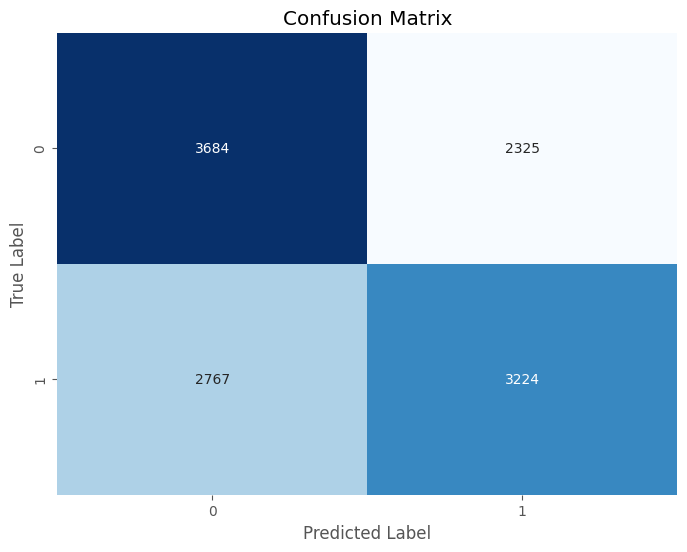

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, Y_test):
    # Make predictions
    Y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy:", accuracy)
    
    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, Y_pred))
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

   


   

# Train Random Forest
model_rf = train_random_forest(X_train, Y_train)

# Evaluate Model
evaluate_model(model_rf, X_test, Y_test)


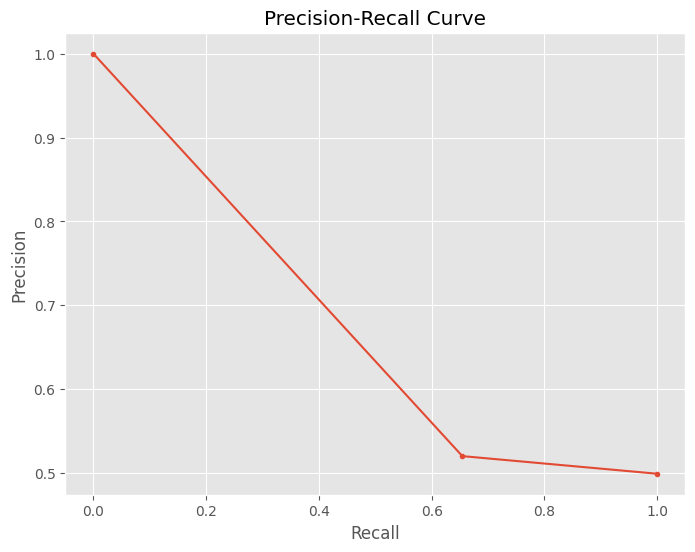

In [48]:
# Predict probabilities
from sklearn.metrics import precision_recall_curve


Y_pred_proba = model.predict(X_test)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

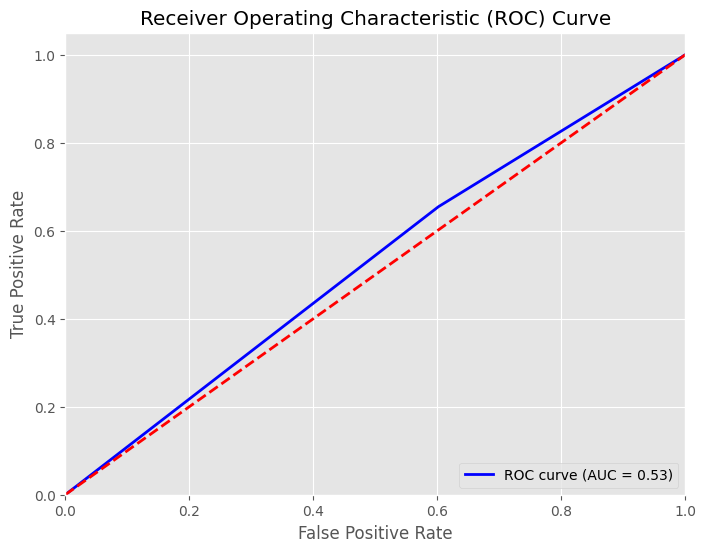

In [49]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
Y_pred_proba = model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


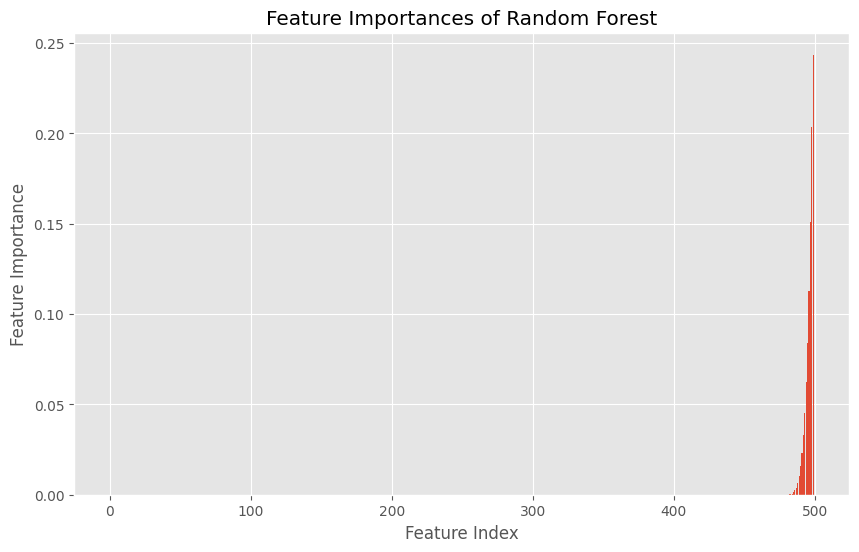

In [50]:
import numpy as np

# Get the number of features
num_features = X_train.shape[1]

# Initialize an array to store feature importances
feature_importances = np.zeros(num_features)

# Loop through each tree in the Random Forest
for tree in model_rf.estimators_:
    # Accumulate feature importances from each tree
    feature_importances += tree.feature_importances_

# Average feature importances across all trees
feature_importances /= len(model_rf.estimators_)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of Random Forest')
plt.show()


In [51]:
#akshra end

In [52]:
#AAFTAB START

In [53]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

In [54]:
# Load the dataset
data = pd.read_csv('C:/Users/Asus/Downloads/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', engine='python')
data.columns = ["label", "time", "date", "query", "username", "text"]

In [55]:
# Preprocessing steps
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
    # Remove usernames
    text = re.sub('@[^\s]+', ' ', text)
    # Remove numbers
    text = re.sub('[0-9]+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    # Join tokens back into a single string
    processed_text = ' '.join(stemmed_tokens)
    return processed_text

In [56]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
# Apply preprocessing to text column
data['text'] = data['text'].apply(preprocess_text)

In [58]:
# Preprocessed data
X = data['text']
y = data['label']

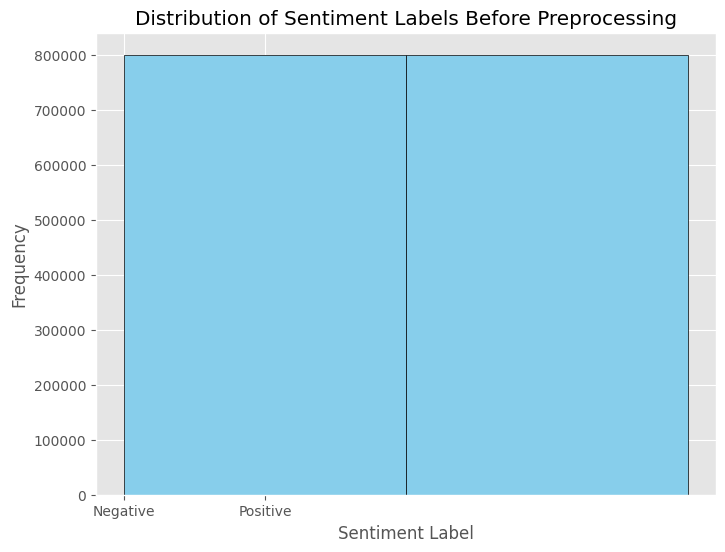

In [59]:
# Histogram of sentiment labels before preprocessing
plt.figure(figsize=(8, 6))
plt.hist(data['label'], bins=2, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Labels Before Preprocessing')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

In [60]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [61]:
# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000)

In [62]:
# Fit TF-IDF vectorizer on training data and transform training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [63]:
# Define and train Multinomial Naive Bayes model
def train_naive_bayes(X_train, y_train):
    model = MultinomialNB()
    model.fit(X_train, y_train)
    return model

In [64]:
# Function to evaluate Multinomial Naive Bayes model
def evaluate_naive_bayes(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [65]:
# Train Multinomial Naive Bayes model
nb_model = train_naive_bayes(X_train_tfidf, y_train)

Accuracy: 0.7483791666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75    239722
           4       0.75      0.74      0.75    240278

    accuracy                           0.75    480000
   macro avg       0.75      0.75      0.75    480000
weighted avg       0.75      0.75      0.75    480000



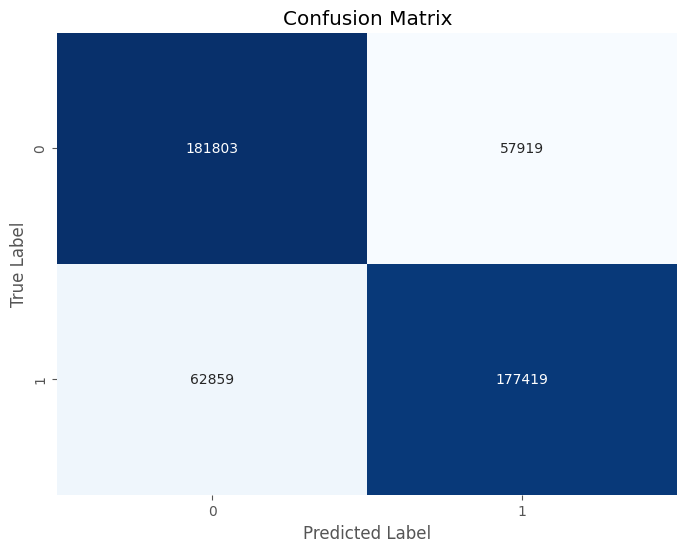

In [66]:
# Evaluate Multinomial Naive Bayes model
evaluate_naive_bayes(nb_model, X_test_tfidf, y_test)

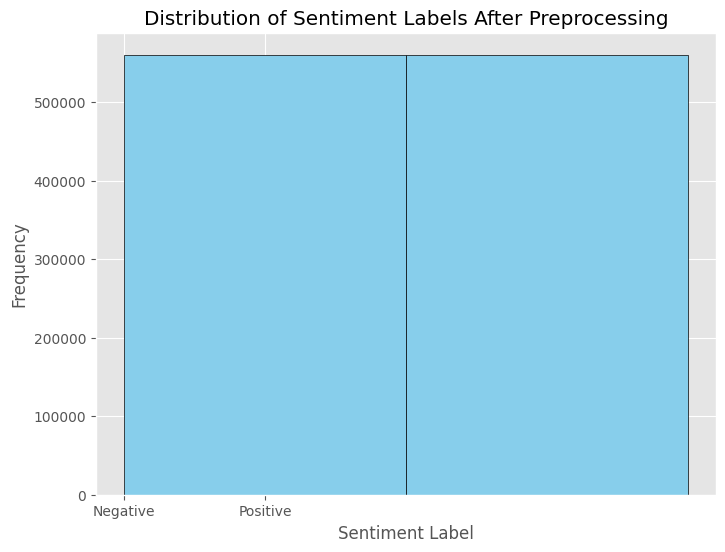

In [67]:
# Histogram of sentiment labels after preprocessing
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=2, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Labels After Preprocessing')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

In [68]:
# Predict probabilities
Y_pred_proba_nb = nb_model.predict_proba(X_test_tfidf)[:, 1]

In [69]:
# Convert 4 to 1 in y_test
y_test_binary = y_test.copy()
y_test_binary[y_test_binary == 4] = 1

In [70]:
# Compute precision-recall curve
precision_nb, recall_nb, _ = precision_recall_curve(y_test_binary, Y_pred_proba_nb)

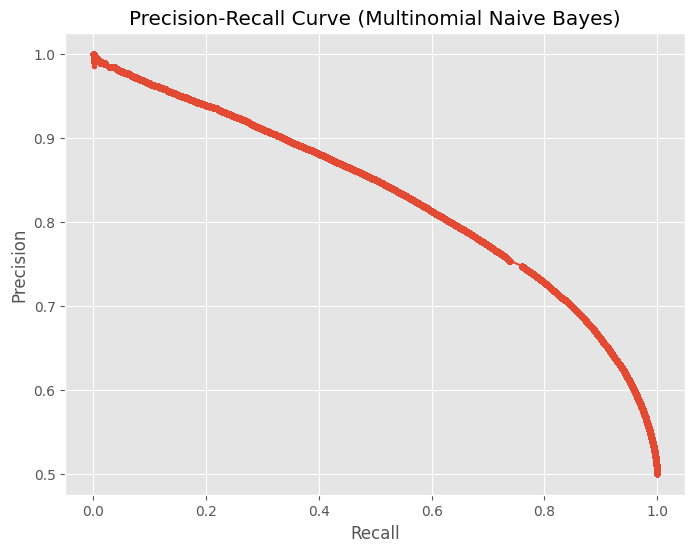

In [71]:
# Plot Precision-Recall curve for Multinomial Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(recall_nb, precision_nb, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multinomial Naive Bayes)')
plt.show()

In [72]:
from sklearn.metrics import roc_curve, auc

# Convert 4 to 1 in y_test
y_test_binary = y_test.copy()
y_test_binary[y_test_binary == 4] = 1

# Plot ROC curve for Multinomial Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_binary, Y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

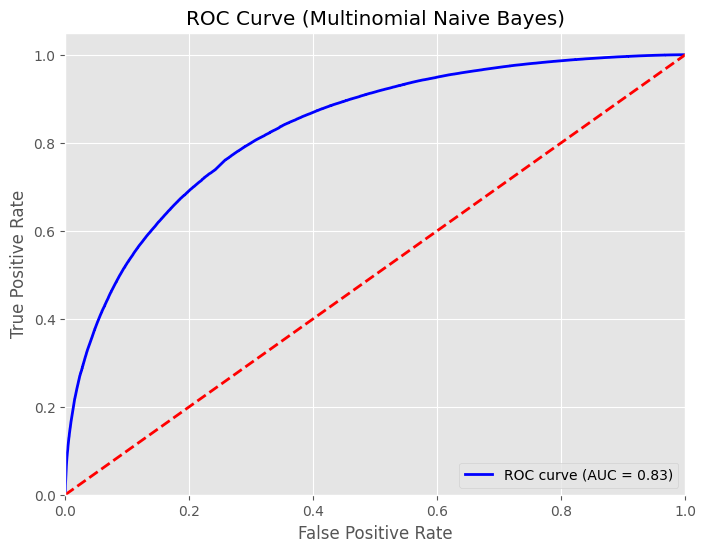

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multinomial Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

In [74]:
#aaftab end

In [75]:
#yashika start 21070122191

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [6]:
# Load the dataset
data = pd.read_csv('C:/Users/Asus/Downloads/training.1600000.processed.noemoticon.csv', encoding="ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

In [7]:
# Preprocessing
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.str.lower()
        X = X.str.replace('[^a-zA-Z\s]', '')
        return X

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.3, random_state=42)

In [9]:
# Define preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', TfidfVectorizer(max_features=10000))
])

In [10]:
# Preprocess text data
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

In [11]:
# Train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=100)
log_reg_model.fit(X_train_processed, y_train)

LogisticRegression()

In [12]:
# Evaluate Logistic Regression model
y_pred_log_reg = log_reg_model.predict(X_test_processed)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Model Accuracy:", accuracy_log_reg)
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Model Accuracy: 0.7952354166666666
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.80      0.78      0.79    239361
           4       0.79      0.81      0.80    240639

    accuracy                           0.80    480000
   macro avg       0.80      0.80      0.80    480000
weighted avg       0.80      0.80      0.80    480000

Confusion Matrix (Logistic Regression):
 [[187590  51771]
 [ 46516 194123]]


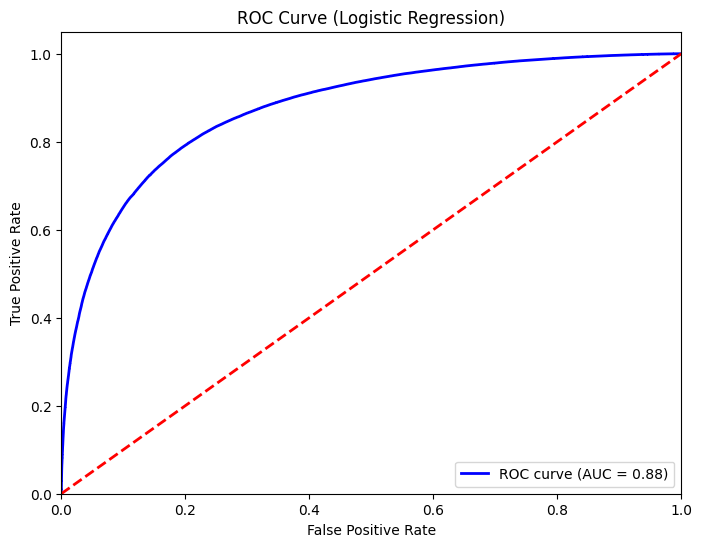

In [13]:
# Map label 4 to 1 for binary classification
y_test_binary = y_test.copy()
y_test_binary[y_test_binary == 4] = 1

# Plot ROC curve
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test_processed)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_binary, y_pred_proba_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()


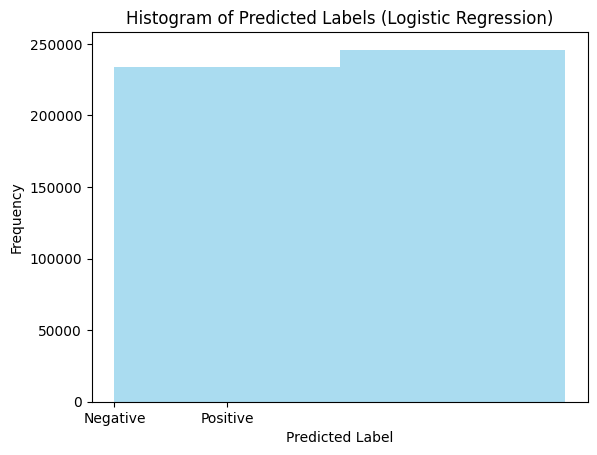

In [14]:
# Plot histogram of predicted labels
plt.hist(y_pred_log_reg, bins=2, color='skyblue', alpha=0.7)
plt.xlabel('Predicted Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Labels (Logistic Regression)')
plt.xticks(np.arange(2), ['Negative', 'Positive'])
plt.show()

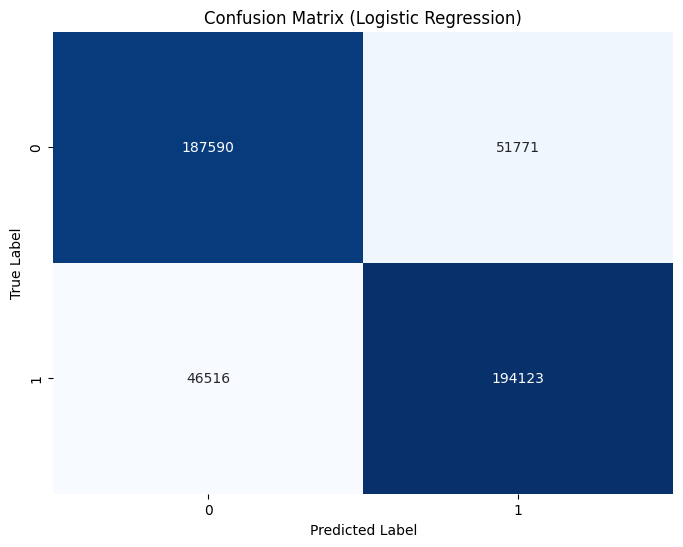

In [15]:
# Plot confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

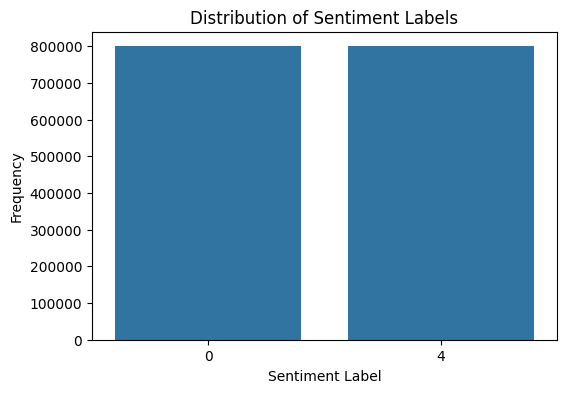

In [16]:
# Plot distribution of sentiment labels in the dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.show()

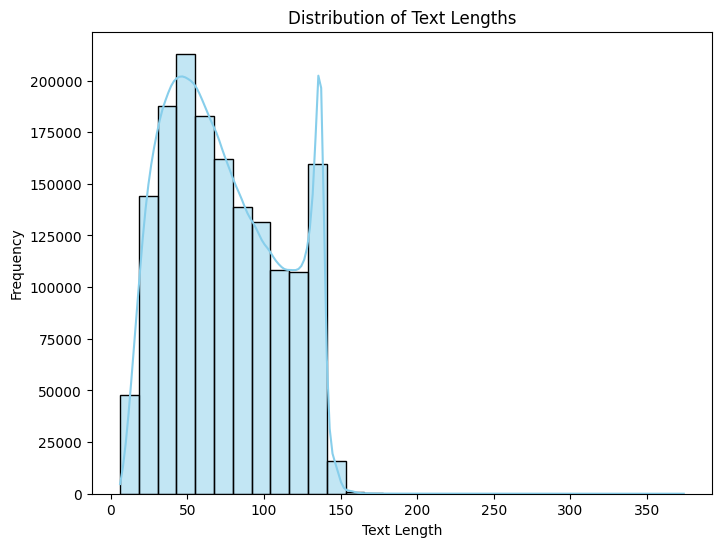

In [17]:
# Plot distribution of text lengths
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data['text_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

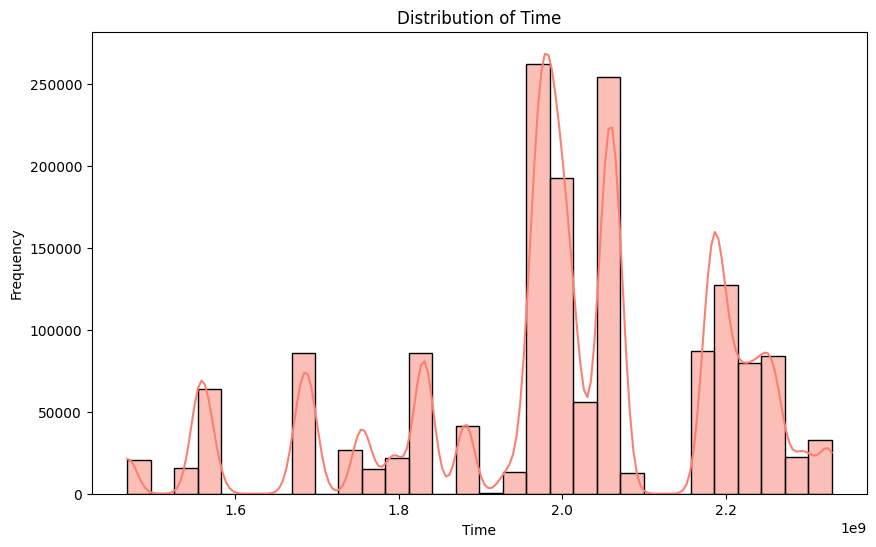

In [18]:
# Plot time distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['time'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# yashika end 

Decision Tree:
Accuracy: 0.5261666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.40      0.46      6009
           1       0.52      0.65      0.58      5991

    accuracy                           0.53     12000
   macro avg       0.53      0.53      0.52     12000
weighted avg       0.53      0.53      0.52     12000



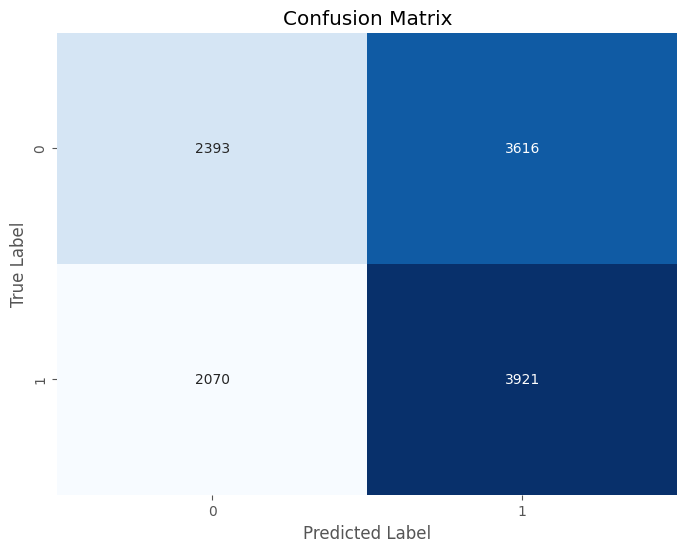


Random Forest:
Accuracy: 0.5531666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.60      0.57      6009
           1       0.56      0.51      0.53      5991

    accuracy                           0.55     12000
   macro avg       0.55      0.55      0.55     12000
weighted avg       0.55      0.55      0.55     12000



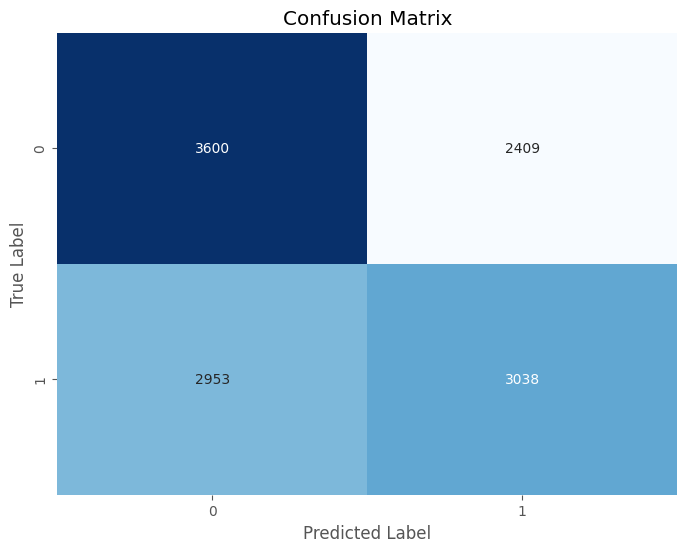


Multinomial Naive Bayes:
Accuracy: 0.5176666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.29      0.38      6009
           1       0.51      0.74      0.61      5991

    accuracy                           0.52     12000
   macro avg       0.52      0.52      0.49     12000
weighted avg       0.52      0.52      0.49     12000



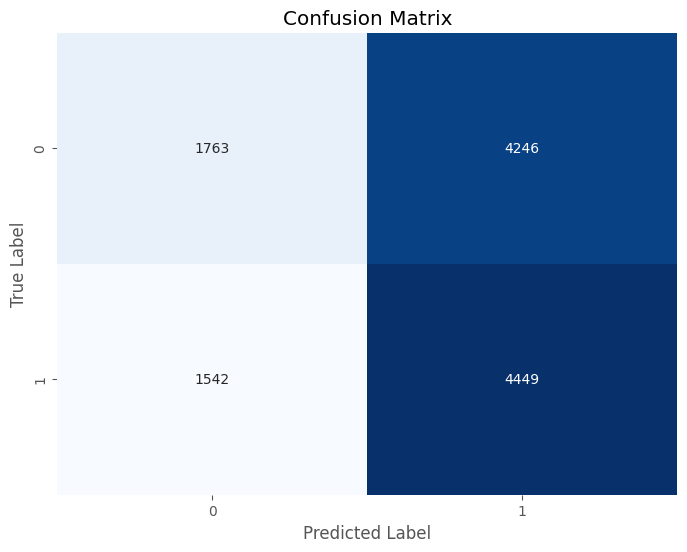


Logistic Regression:
Accuracy: 0.5135833333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      6009
           1       0.51      0.53      0.52      5991

    accuracy                           0.51     12000
   macro avg       0.51      0.51      0.51     12000
weighted avg       0.51      0.51      0.51     12000



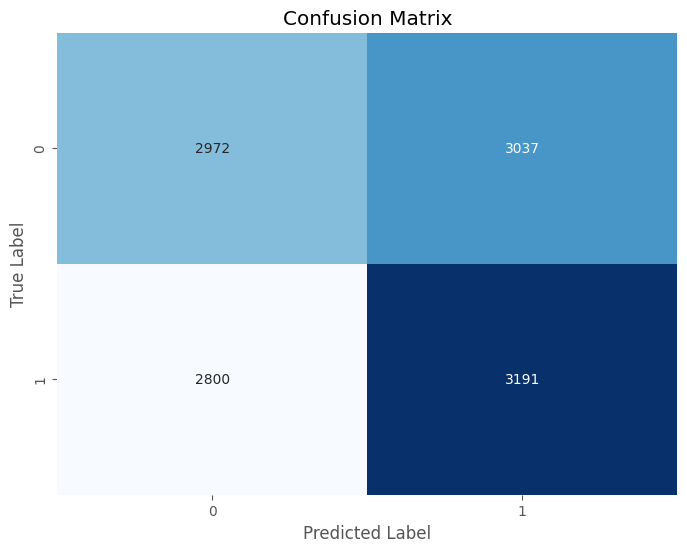

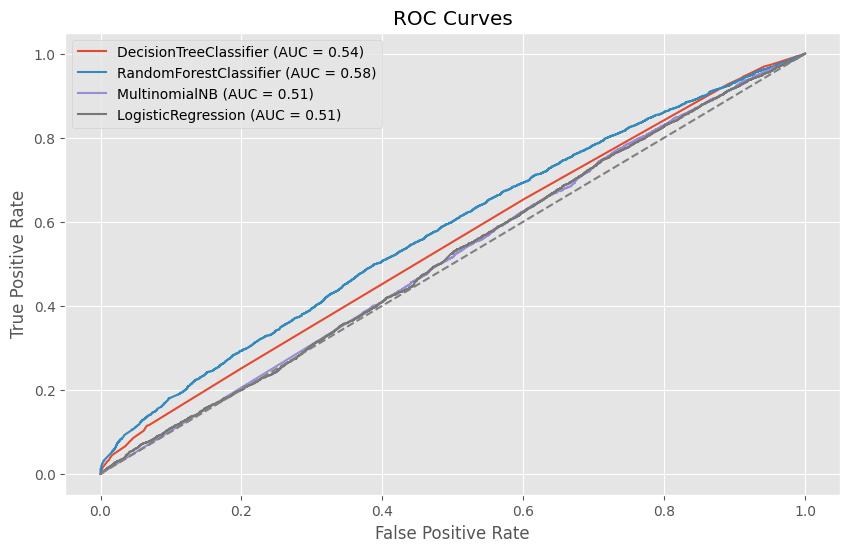

In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Define and train Decision Tree model
def train_decision_tree(X_train, Y_train, max_depth=None):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, Y_train)
    return model

# Define and train Random Forest model
def train_random_forest(X_train, Y_train, n_estimators=100, max_depth=None):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, Y_train)
    return model

# Define and train Multinomial Naive Bayes model
def train_naive_bayes(X_train, Y_train):
    model = MultinomialNB()
    model.fit(X_train, Y_train)
    return model

# Define and train Logistic Regression model
def train_logistic_regression(X_train, Y_train):
    model = LogisticRegression(max_iter=100)
    model.fit(X_train, Y_train)
    return model

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Define a function to plot ROC curves
def plot_roc_curves(models, X_tests, y_tests):
    plt.figure(figsize=(10,6))
    for model, X_test, y_test in zip(models, X_tests, y_tests):
        if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
            y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc_score = roc_auc_score(y_test, y_prob)
            plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

# Now let's redefine and retrain the models using the new data split

# Define and train Decision Tree model
model_dt = train_decision_tree(X_train, y_train, max_depth=5)

# Define and train Random Forest model
model_rf = train_random_forest(X_train, y_train, n_estimators=100, max_depth=10)

# Define and train Multinomial Naive Bayes model
model_nb = train_naive_bayes(X_train, y_train)

# Define and train Logistic Regression model
model_log_reg = train_logistic_regression(X_train, y_train)

# Now let's evaluate the models and plot ROC curves
# Step 1: Evaluate models
print("Decision Tree:")
evaluate_model(model_dt, X_test, y_test)
print("\nRandom Forest:")
evaluate_model(model_rf, X_test, y_test)
print("\nMultinomial Naive Bayes:")
evaluate_model(model_nb, X_test, y_test)
print("\nLogistic Regression:")
evaluate_model(model_log_reg, X_test, y_test)

# Step 2: Plot ROC curves
plot_roc_curves([model_dt, model_rf, model_nb, model_log_reg], [X_test, X_test, X_test, X_test], [y_test, y_test, y_test, y_test])


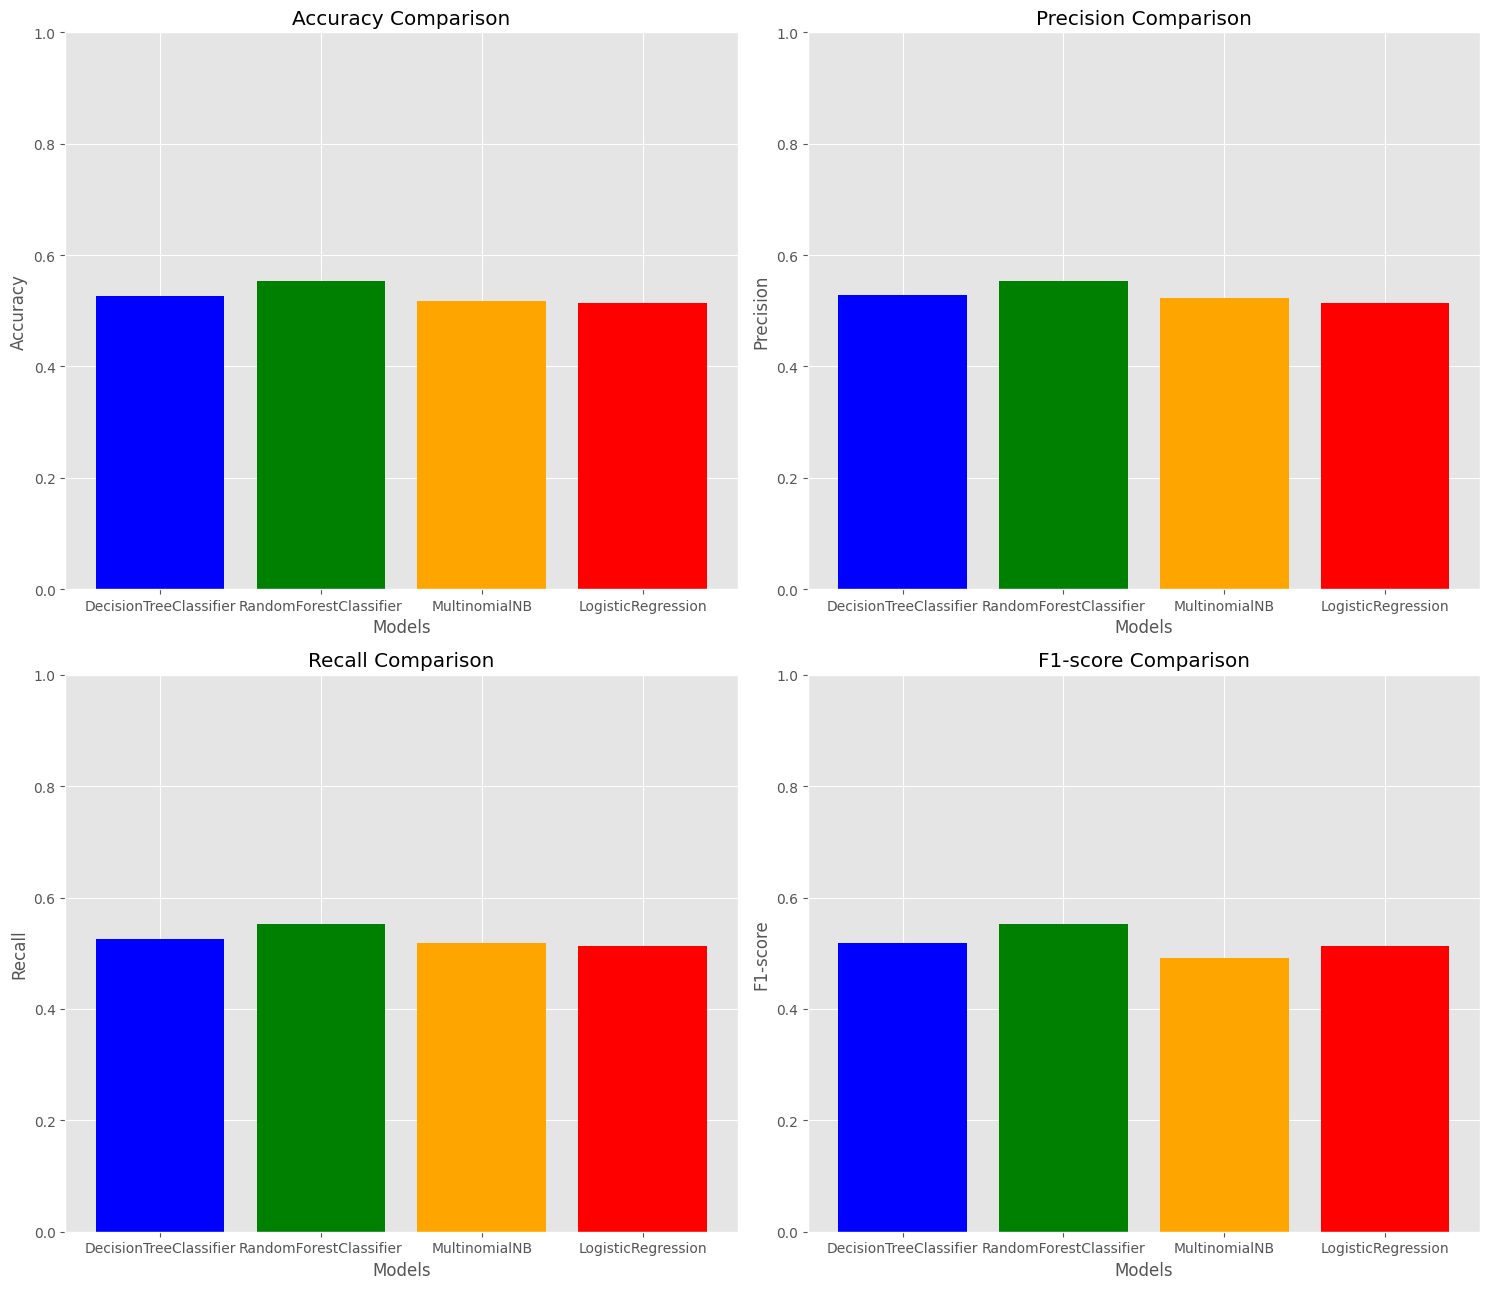

In [55]:
# Define a function to plot bar chart for comparison of classification metrics
def plot_classification_metrics(models, X_tests, y_tests):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    plt.figure(figsize=(15, 13))
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        scores = []
        for model, X_test, y_test in zip(models, X_tests, y_tests):
            if metric == 'Accuracy':
                score = accuracy_score(y_test, model.predict(X_test))
            elif metric == 'Precision':
                score = classification_report(y_test, model.predict(X_test), output_dict=True)['macro avg']['precision']
            elif metric == 'Recall':
                score = classification_report(y_test, model.predict(X_test), output_dict=True)['macro avg']['recall']
            elif metric == 'F1-score':
                score = classification_report(y_test, model.predict(X_test), output_dict=True)['macro avg']['f1-score']
            scores.append(score)
        plt.bar([type(model).__name__ for model in models], scores, color=['blue', 'green', 'orange', 'red'])
        plt.xlabel('Models')
        plt.ylabel(metric)
        plt.title(f'{metric} Comparison')
        plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Now let's call the function to plot classification metrics
plot_classification_metrics([model_dt, model_rf, model_nb, model_log_reg], [X_test, X_test, X_test, X_test], [y_test, y_test, y_test, y_test])


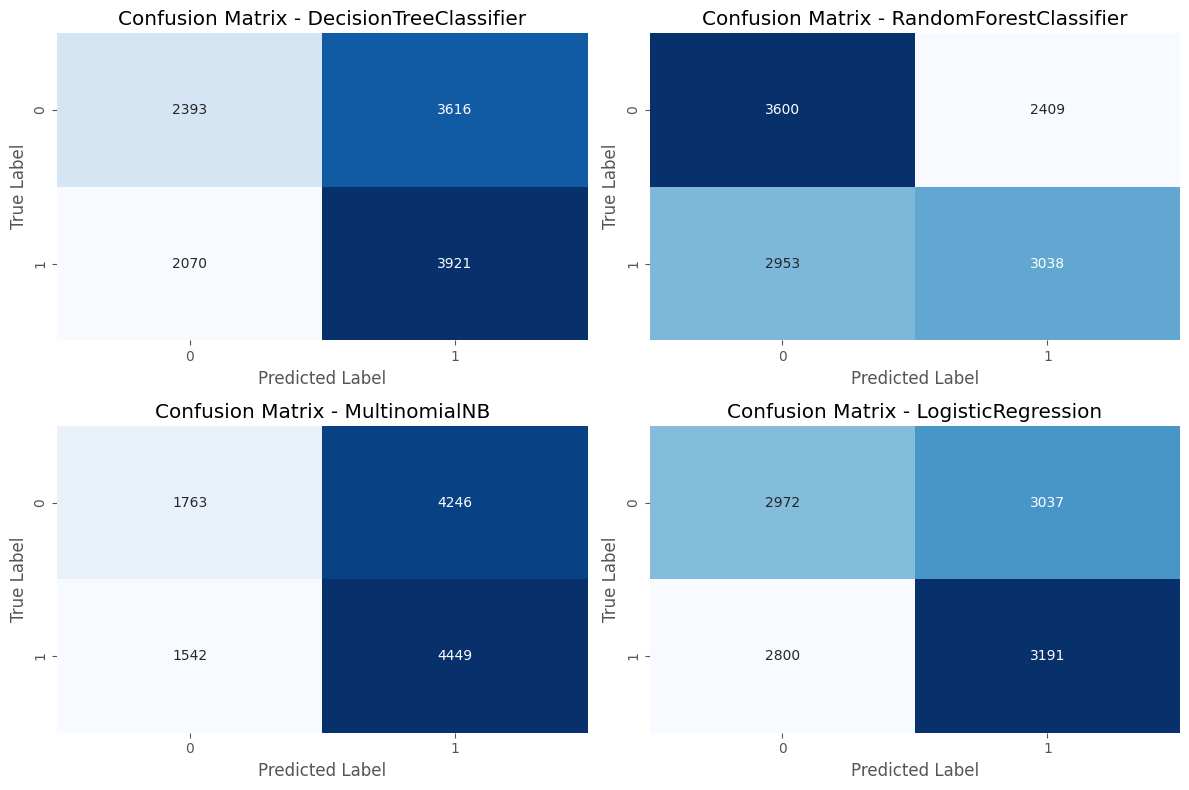

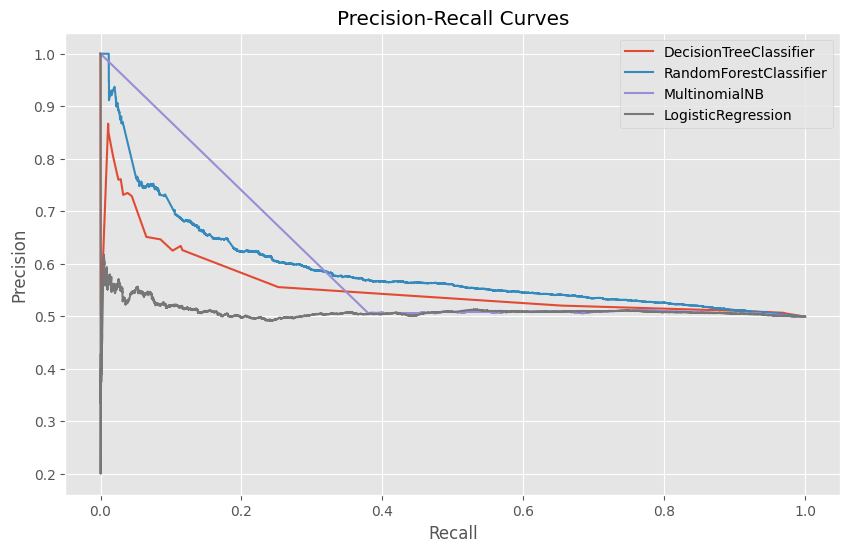

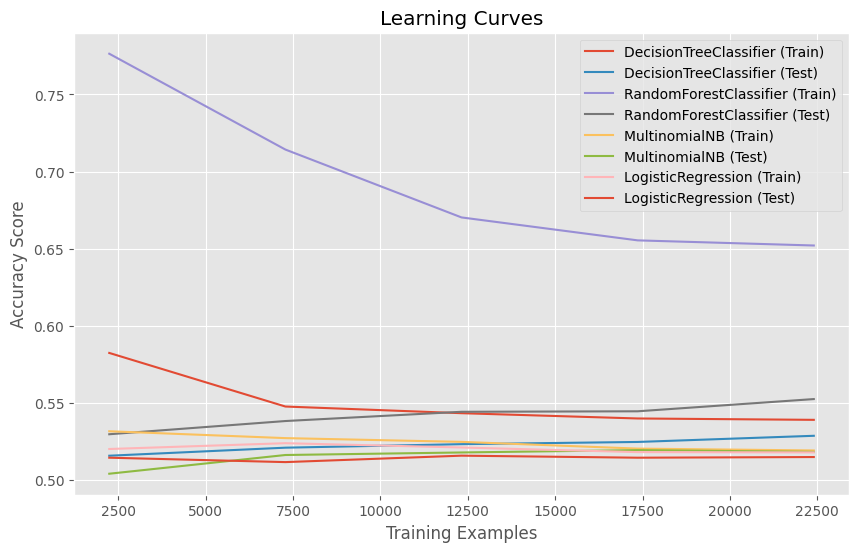

In [54]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import learning_curve
import numpy as np

# Define a function to plot confusion matrices for classification models
def plot_confusion_matrices(models, X_tests, y_tests):
    plt.figure(figsize=(12, 8))
    for i, model in enumerate(models, 1):
        plt.subplot(2, 2, i)
        sns.heatmap(confusion_matrix(y_tests[i-1], model.predict(X_tests[i-1])), annot=True, cmap='Blues', cbar=False, fmt='d')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {type(model).__name__}')
    plt.tight_layout()
    plt.show()

# Define a function to plot precision-recall curves
def plot_precision_recall_curves(models, X_tests, y_tests):
    plt.figure(figsize=(10, 6))
    for model, X_test, y_test in zip(models, X_tests, y_tests):
        if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
            y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
            precision, recall, _ = precision_recall_curve(y_test, y_prob)
            plt.plot(recall, precision, label=f'{type(model).__name__}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend()
    plt.show()

# Define a function to plot learning curves
def plot_learning_curves(models, X_train, y_train):
    plt.figure(figsize=(10, 6))
    for model in models:
        train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        plt.plot(train_sizes, train_scores_mean, label=f'{type(model).__name__} (Train)')
        plt.plot(train_sizes, test_scores_mean, label=f'{type(model).__name__} (Test)')

    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy Score')
    plt.title('Learning Curves')
    plt.legend()
    plt.show()
# Now let's call the functions to plot comparison plots
plot_confusion_matrices([model_dt, model_rf, model_nb, model_log_reg], [X_test, X_test, X_test, X_test], [y_test, y_test, y_test, y_test])
plot_precision_recall_curves([model_dt, model_rf, model_nb, model_log_reg], [X_test, X_test, X_test, X_test], [y_test, y_test, y_test, y_test])
plot_learning_curves([model_dt, model_rf, model_nb, model_log_reg], X_train, y_train)

